In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls '/content/drive/My Drive/Eventlog/'


 4events.csv		     Examplejulian.xes
 4events.pnml		     Example_xes_csv1.csv
 4events.xes		     Example_xes_csv.csv
 Alignment.ipynb	     helpdesk_2_kfoldcv_0_0.2_1.0_model.pnml
 Event_log.ipynb	     helpdesk_2_kfoldcv_0_0.3_0.4_model.pnml
 Examplebadjulian1.pnml      helpdesk_kfoldcv_0_test.csv
 Examplebadjulian.csv	     helpdesk.xes
 Examplebadjulian.pnml	     modified.csv
 Examplebadjulian.xes	     pnml_to_csv.csv
'Example CSV for SM.pnml'   'Reading_xes_file (2).ipynb'
 Examplejulianchanges.csv   'Reading_xes_file (3).ipynb'
 Examplejulianchanges.pnml  'Reading_xes_file (4).ipynb'
 Examplejulian.pnml	    'Reading_xes_file (5).ipynb'


In [0]:
!pip install pm4py

In [0]:
#Importing library to read log file
from pm4py.objects.log.importer.xes import factory as xes_import_factory
import pandas as pd


## loading xes file and reading the file

In [0]:
#File path
filename = '/content/drive/My Drive/Eventlog/Examplebadjulian.xes'
log = xes_import_factory.apply(filename)

## converting xes to csv and reading the file using pandas

In [0]:
from pm4py.objects.log.exporter.csv import factory as csv_exporter
filename = "/content/drive/My Drive/Eventlog/Example_xes_csv.csv"
csv_exporter.export(log, filename)

In [0]:
filename =  "/content/drive/My Drive/Eventlog/helpdesk_kfoldcv_0_test.csv"
df = pd.read_csv(filename,header=None)
df.columns = ['case:concept:name','time:timestamp','concept:name']

In [0]:
df.loc[:,"case:concept:name"].unique()

array([1, 8, 6, 3, 9, 2, 4])

lets test example bad julian csv and pnml on our codes, 0.74 

## Function to convert single event to combined event

In [0]:
def modify_data(df_eve,unique_id):
  
  case_id = []
  activity_id = []
  complete_time_stamp = []


  for i in range(1,len(unique_id)+1):
    
    try:
  
      row_filter = df_eve.loc[df_eve['case:concept:name']==i,:]
      row_filter  = row_filter.reset_index(drop=True)

      for n in range(len(row_filter)):
        case_id.append(row_filter.loc[row_filter['case:concept:name']==i,'case:concept:name'][n])

      case_id.append(row_filter.loc[row_filter['case:concept:name']==i,'case:concept:name'][n])
    
    except:
      continue
  
  
  
  for i in range(1,len(unique_id)+1):
    
    try:
  
      row_filter = df_eve.loc[df_eve['case:concept:name']==i,:]
      row_filter  = row_filter.reset_index(drop=True)

      for n in range(len(row_filter)):
        complete_time_stamp.append(row_filter.loc[row_filter['case:concept:name']==i,'time:timestamp'][n])

      complete_time_stamp.append(row_filter.loc[row_filter['case:concept:name']==i,'time:timestamp'][n])
    
    except:
      continue
    
  
  for i in range(1,len(unique_id)+1):
    try:
  
      row_filter = df_eve.loc[df_eve['case:concept:name']==i,:]
      row_filter  = row_filter.reset_index(drop=True)

      activity_id.append('start')
      for n in range(len(row_filter)-1):
        activity_id.append(row_filter.loc[row_filter['case:concept:name']==i,'concept:name'][n]+row_filter.loc[row_filter['case:concept:name']==i,'concept:name'][n+1])

      activity_id.append('end')
    
    except:
      continue
  
  
  dic_data = {'case:concept:name':case_id,'concept:name':activity_id,'time:timestamp':complete_time_stamp, }
  df_modified = pd.DataFrame(dic_data)
  
  return df_modified

In [0]:
unique_id = df["case:concept:name"].unique()
modified_csv = modify_data(df,unique_id)

ValueError: ignored

In [0]:
modified_csv.to_csv('/content/drive/My Drive/Eventlog//modified.csv',index=True)

# Exploring  PNML file

In [0]:
import os
from pm4py.objects.petri.importer import pnml as pnml_importer
filename = '/content/drive/My Drive/Eventlog/Examplejulianchanges.pnml'
net, initial_marking, final_marking = pnml_importer.import_net(filename)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated function import_net.
  after removing the cwd from sys.path.


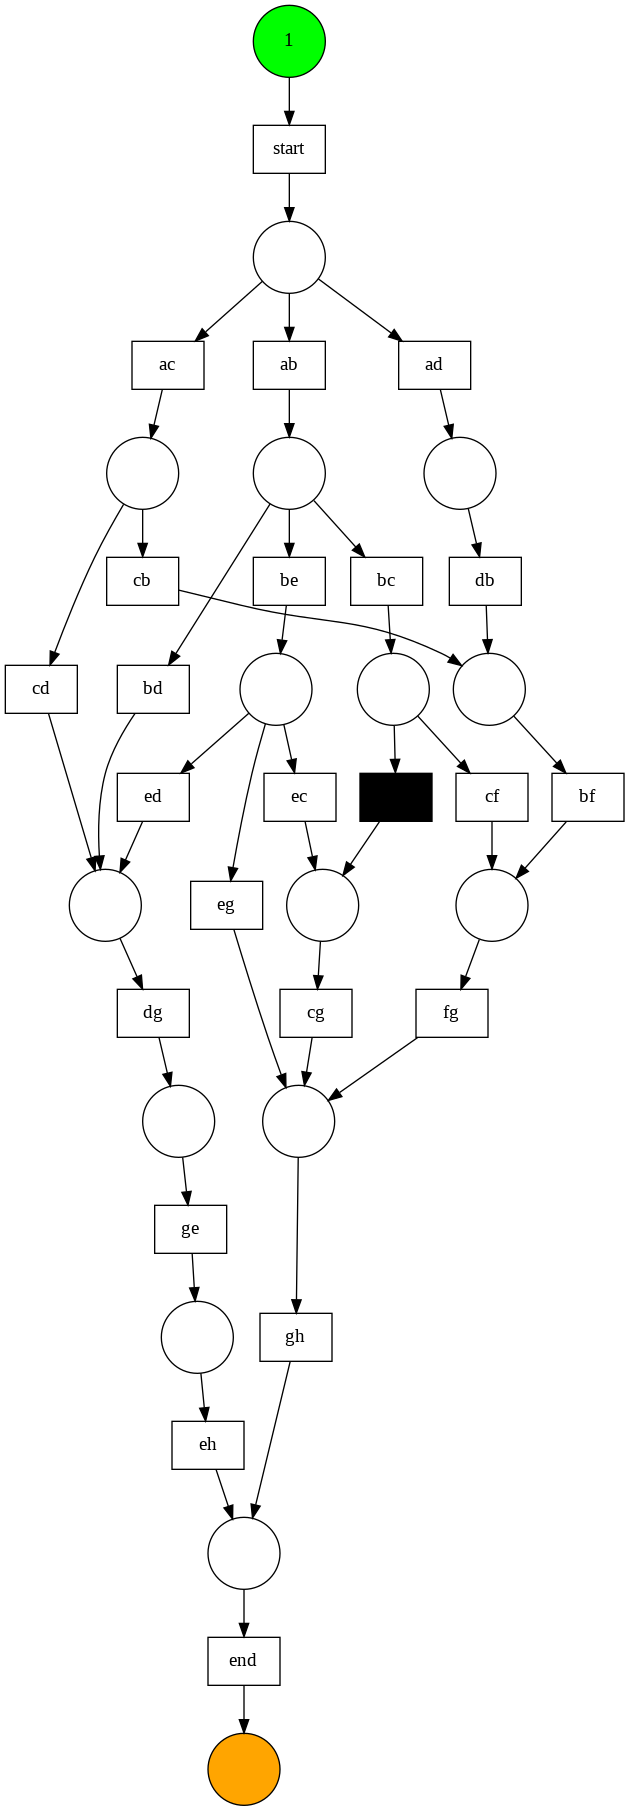

In [0]:
from pm4py.visualization.petrinet import factory as pn_vis_factory
gviz = pn_vis_factory.apply(net, initial_marking, final_marking)
pn_vis_factory.view(gviz)